# Crossfit athletes results exploration

## Preliminary Wrangling and Cleaning

The dataset contains information about crossfit athletes that were competing in 2015 year. The original dataset was taken from here https://data.world/bgadoci/crossfit-data. The original dataset had information about 423k athletes with 26 characteristics including region, team, results, and other information. It also contained a lot of null values (NaN, NA, -, 0 etc.). Since I wanted to have the complete information about every athlete in my dataset, I decided to keep only those rows that doesn't contain null values. I also decided to keep only information about athlete's results and his parameters, such as age, height, weight and training style. In this project, I want to explore how athlete's parameters affect their results. 

## Dataset description

Here is the final set of columns in my dataset:

- **name** : Athlete's name

Athlete Parameteres:
- **gender** : Athlete's gender
- **age** : Athlete's age
- **height** : Athlete's height
- **weight** : Athlete's weight
- **background** : Athlete's sport background (if any)
- **schedule** : Athlete's workout schedule
- **howlong** : Athlete's crossfit experience

Athlete's Results:
- **candj** : Personal record in Clean and Jerk (weightlifting)
- **snatch** : Personal record in Snatch (weightlifting)
- **deadlift** : Personal record in Deadlift 
- **backsq** : Personal record in Back Squat
- **pullups** : Maximum unbroken pull-ups



In [51]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading dataset:

In [52]:
athletes = pd.read_csv('athletes_complete.csv')
athletes.head()

,name,gender,age,height,weight,candj,snatch,deadlift,backsq,pullups,background,schedule,howlong
0,Mike Abgarian,Male,31,65,150,290,225,465,405,81,Pro or college sports,Multiple workouts in a day,2-4 years
1,Erik Acevedo,Male,30,71,200,235,175,385,315,35,Pro or college sports,One or multiple,1-2 years
2,Richard Ablett,Male,28,70,176,187,134,335,254,27,No athletic background,One or multiple,2-4 years
3,Joji Abasolo,Male,39,66,158,185,135,385,285,31,"Some sport (youth, school, recreational)",Multiple workouts in a day,1-2 years
4,Jerry Abadom,Male,44,72,214,265,198,551,485,37,Pro or college sports,One or multiple,1-2 years


In [53]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21105 entries, 0 to 21104
Data columns (total 13 columns):
name          21105 non-null object
gender        21105 non-null object
age           21105 non-null int64
height        21105 non-null int64
weight        21105 non-null int64
candj         21105 non-null int64
snatch        21105 non-null int64
deadlift      21105 non-null int64
backsq        21105 non-null int64
pullups       21105 non-null int64
background    21105 non-null object
schedule      21105 non-null object
howlong       21105 non-null object
dtypes: int64(8), object(5)
memory usage: 2.1+ MB


The "gender", "background", "schedule" and "howlong" columns should be categorical. I'll convert them now.

In [54]:
# converting gender (unordered)
genders = ['Male', 'Female']
vclasses = pd.api.types.CategoricalDtype(ordered=False, categories=genders)
athletes['gender'] = athletes['gender'].astype(vclasses)

# converting gender (ordered from no background to pro)
backgrounds = ['No athletic background', 'Some sport (youth, school, recreational)', 'Pro or college sports']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=backgrounds)
athletes['background'] = athletes['background'].astype(vclasses)

# converting schedules (ordered from one to multiple workouts per day)
schedules = ['One workout a day', 'One or multiple', 'Multiple workouts in a day']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=schedules)
athletes['schedule'] = athletes['schedule'].astype(vclasses)

# converting howlong (ordered from less than year to 4+ years)
howlongs = ['Less than 1 year', '1-2 years', '2-4 years', '4+ years']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=howlongs)
athletes['howlong'] = athletes['howlong'].astype(vclasses)

In [55]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21105 entries, 0 to 21104
Data columns (total 13 columns):
name          21105 non-null object
gender        21105 non-null category
age           21105 non-null int64
height        21105 non-null int64
weight        21105 non-null int64
candj         21105 non-null int64
snatch        21105 non-null int64
deadlift      21105 non-null int64
backsq        21105 non-null int64
pullups       21105 non-null int64
background    21105 non-null category
schedule      21105 non-null category
howlong       21105 non-null category
dtypes: category(4), int64(8), object(1)
memory usage: 1.5+ MB


Now it's fine. 

We have 8 numeric variables (3 for parameters and 5 for results) and 4 categorical variables (all of them describe athlete's parameters and style)

The main features of interest are the results:
- **pullups** - base gymnastics movement
- **snatch + clean and jerk** - two movements from weightlifting
- **deadlift + backsquat** - two movements from powerlifting

On the other hand, there are the parameters that may affect those results:
- **age, gender, height, weight** - physical parameters of an athlete
- **background, schedule, howlong** - where the athlete came from, how often and how long does he train

## Univariate Exploration


### Results distribution

Starting from the distribution of maximum pullups. Since all results are numeric, I'll plot their distributions as histograms

In [56]:
athletes.pullups.describe()

count    21105.000000
mean        30.510258
std         15.168022
min          1.000000
25%         20.000000
50%         30.000000
75%         40.000000
max         98.000000
Name: pullups, dtype: float64

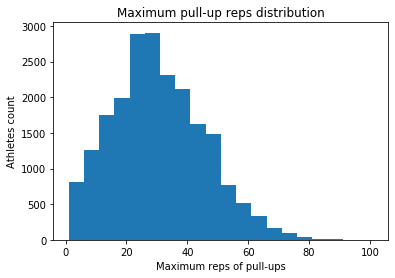

In [57]:
bins = np.arange(1, 98 + 5, 5)
plt.hist(data = athletes, x='pullups', bins=bins)
plt.xlabel('Maximum reps of pull-ups')
plt.ylabel('Athletes count')
plt.title('Maximum pull-up reps distribution');

It's almost a normal distribution. Most of the data lies between 10 and 50 reps

Now I want to see the distribution of weightlifting results plotted together as subplots. Probably it will make sense to sum up these columns into one.

In [58]:
athletes.snatch.describe()

count    21105.000000
mean       162.067709
std         46.819431
min         15.000000
25%        130.000000
50%        165.000000
75%        195.000000
max        375.000000
Name: snatch, dtype: float64

In [68]:
athletes.candj.describe()

count    21105.000000
mean       212.333760
std         56.377838
min         17.000000
25%        175.000000
50%        215.000000
75%        255.000000
max        428.000000
Name: candj, dtype: float64

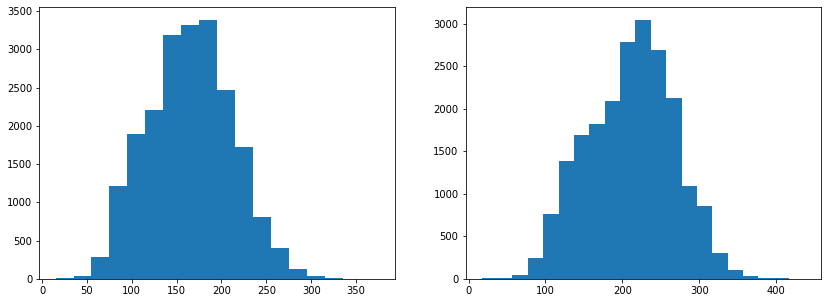

In [115]:
snatch_bins = np.arange(15, 375 + 20, 20)
clean_bins = np.arange(17, 428 + 20, 20)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5))
ax1.hist(data = athletes, x='snatch', bins=snatch_bins)
ax2.hist(data = athletes, x='candj', bins=clean_bins);

The distributions look almost equal. But to make sure that it makes sense to add one column called "weightlifting", that contains sum of snatch and C&J results, I want to get a correlation between those variables in the next section.

The "deadlift" and "backsq" need the same check as "snatch" and "candj".

In [116]:
athletes.deadlift.describe()

count    21105.000000
mean       375.029519
std         92.808112
min         11.000000
25%        309.000000
50%        385.000000
75%        441.000000
max        893.000000
Name: deadlift, dtype: float64

In [117]:
athletes.backsq.describe()

count    21105.000000
mean       303.467993
std         82.805103
min         12.000000
25%        245.000000
50%        309.000000
75%        365.000000
max        882.000000
Name: backsq, dtype: float64

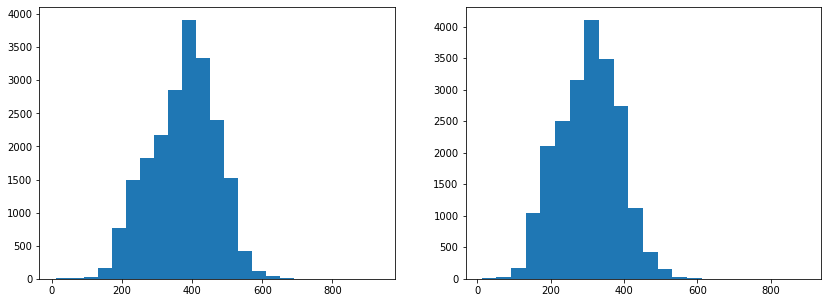

In [121]:
deadlift_bins = np.arange(11, 893+50, 40)
backsq_bins = np.arange(12, 882+50, 40)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,5))
ax1.hist(data = athletes, x='deadlift', bins=deadlift_bins)
ax2.hist(data = athletes, x='backsq', bins=backsq_bins);

Again these distributions look vary similar and close to normal

Now, I want to look at some athlete parameters distributions. The most interesting are background and how long they do crossfit. 

In [110]:
athletes['background'].value_counts()

Some sport (youth, school, recreational)    12296
Pro or college sports                        6480
No athletic background                       2329
Name: background, dtype: int64

Since background only has 3 different values, the best kind of plot is pie chart.

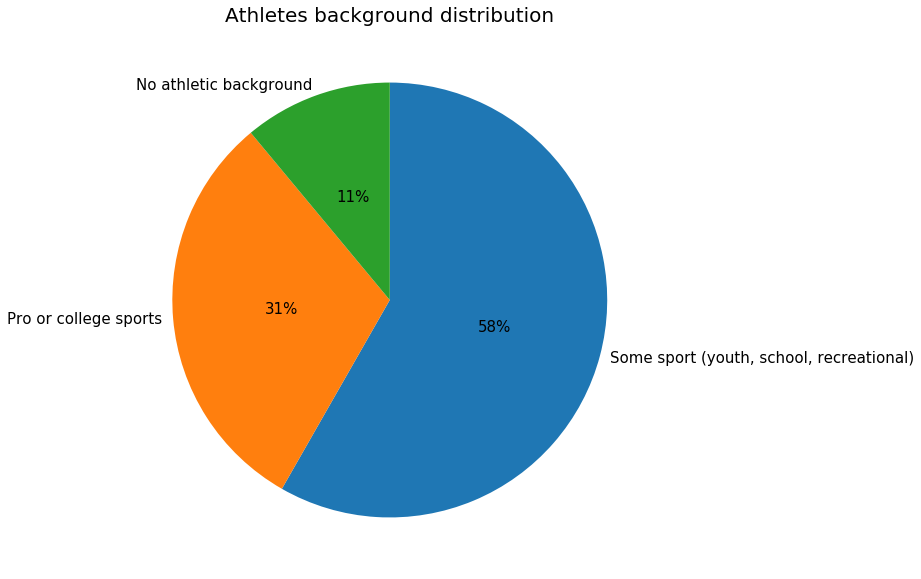

In [109]:
plt.figure(figsize=(10,10))

values = athletes['background'].value_counts()
labels = athletes['background'].value_counts().keys().values

plt.pie(values, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.05, 
        counterclock=False, startangle = 90,textprops={'fontsize': 15})
plt.title('Athletes background distribution', fontsize=20);

Most athletes had some sports in their life, some were pros and only 11% had no athletic background.

In [112]:
athletes['howlong'].value_counts()

2-4 years           7343
1-2 years           7067
Less than 1 year    3491
4+ years            3204
Name: howlong, dtype: int64

For this parameter, I'll make a bar chart.

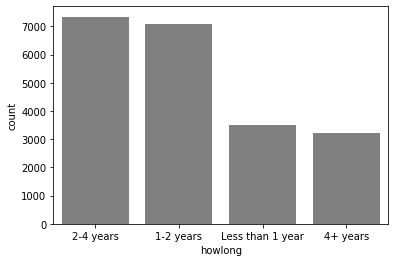

In [114]:
orders = athletes['howlong'].value_counts().index
sb.countplot(data=athletes, x='howlong', color='grey', order=orders);

Here is an interesting situation. If this variable was numeric, it would probably have normally distributed values. Most of the athletes have 1-4 years of experience. Some are rookies(1 year or less) and some are very experienced(4+ years).

## Bivariate Exploration


First of all, I want to plot all the correlations between the numeric variables using a heatmap.

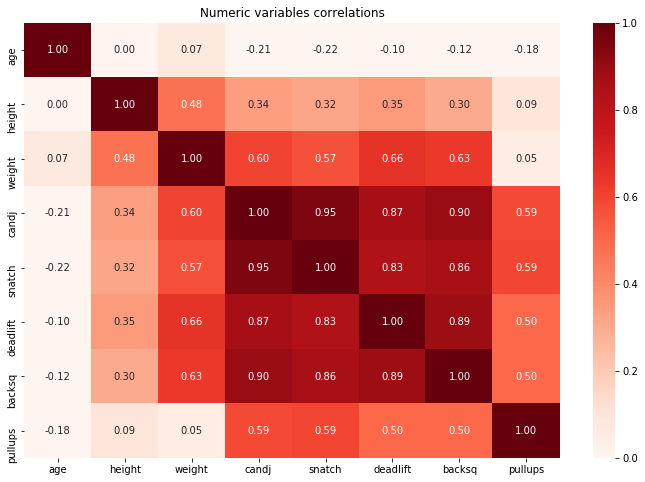

In [129]:
#variables = ['age', 'gender','height','weight','candj','snatch','deadlift','backsq','pullups','background','schedule','howlong']
variables = ['age','height','weight','candj','snatch','deadlift','backsq','pullups']

plt.figure(figsize=(12,8))
sb.heatmap(athletes[variables].corr(), cmap='Reds', annot=True,
           fmt='.2f', vmin=0)
plt.title('Numeric variables correlations');

From this heatmap, it's clear that snatch and candj results have very strong correlations with each other and also with backsq and deadlift. So I think it makes sense to group them into one column called "weightlifting" for further analysis.

In [130]:
athletes['weightlifting'] = athletes['snatch'] + athletes['candj'] + athletes['deadlift'] + athletes['backsq']

Now we have two dependent variables:
- **pullups**: gymnastics result
- **weightlifting**: weightlifting result

Let's explore how other variables affect them

From the heatmap, i clearly see that "weight" has positive correlation with weightlifting results, but almost no correlation with pullups. I want to plot two scatterplots to see how weight of the athlete affects on weightlifting and gymnastics results.

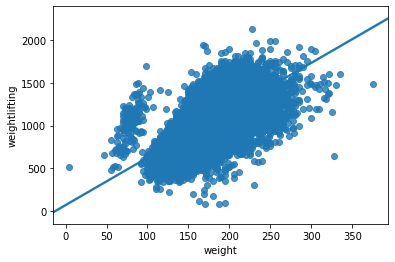

In [136]:
sb.regplot(data=athletes, x='weight', y='weightlifting');

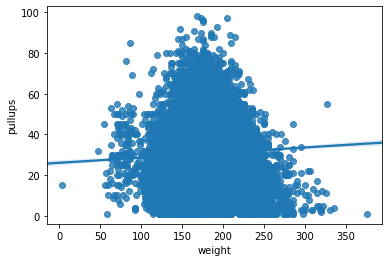

In [137]:
sb.regplot(data=athletes, x='weight', y='pullups');

There is a strong correlation between weight and weightlifting.
There is also a little correlation between weight and pullups. Maybe the reason is in overall weight difference between men and women, but I'll check it in the next section.

For now, I want to see how athlete's background affects his results. Since it's categorical vs numerical, violin or box plots can be useful.

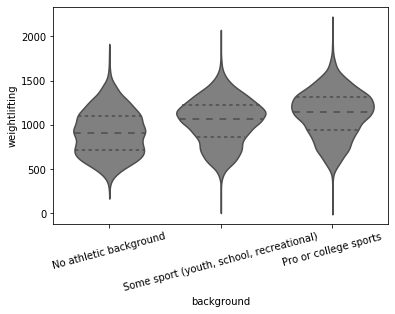

In [140]:
# trying violin plot for background vs weightlifting
sb.violinplot(data=athletes, x='background', y='weightlifting', color='grey', inner='quartile')
plt.xticks(rotation=15);

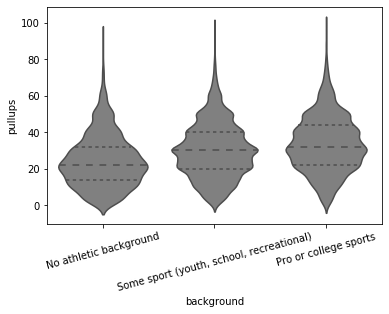

In [141]:
# trying violin plot for background vs pullups
sb.violinplot(data=athletes, x='background', y='pullups', color='grey', inner='quartile')
plt.xticks(rotation=15);

This plot shows that people with pro or college sport background have the best results compared to other groups in weigthlifting. However, in pullups, the results of ex-pros and people doing some sport are almost equal. People with no athletic background tend to lose in both types of competitions.

Another interesting independent variable describes how often an athlete works out. I'll use box plots in this case.

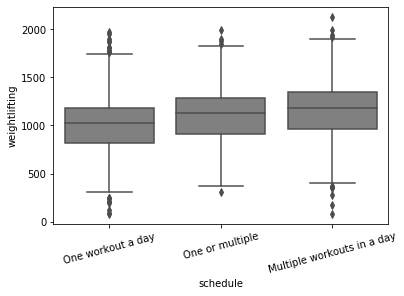

In [143]:
sb.boxplot(data=athletes, x='schedule', y='weightlifting', color='grey')
plt.xticks(rotation=15);

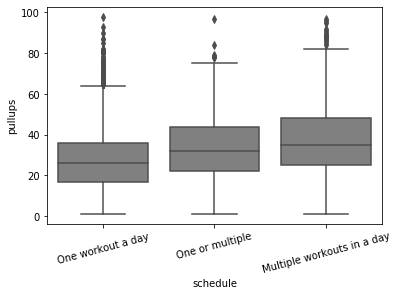

In [144]:
sb.boxplot(data=athletes, x='schedule', y='pullups', color='grey')
plt.xticks(rotation=15);

Again, not a big surprise. People who works out more, tend to have better results!

Lastly, I want to plot age vs both results. Since the variables are numeric, scatter plot is chosen

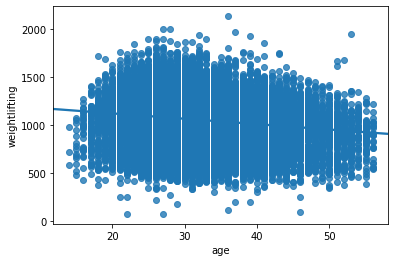

In [145]:
sb.regplot(data=athletes, x='age', y='weightlifting');

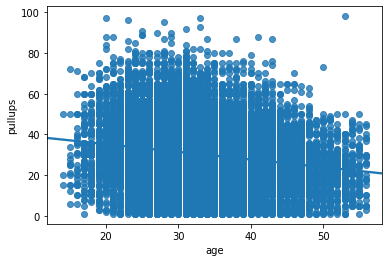

In [147]:
sb.regplot(data=athletes, x='age', y='pullups');

Both kind of results tend to increase to ~18 years and then start to decrease after 35. That's exactly why individual competitions are for athletes from 18 to 35 years old.

## Multivariate Exploration


As I mentioned before, there is a slight correlation between pullups and weight. And I wanted to know, if the gender factor takes any part here. So I'll make the same scatter plot as before, but add the 3rd variable: gender.

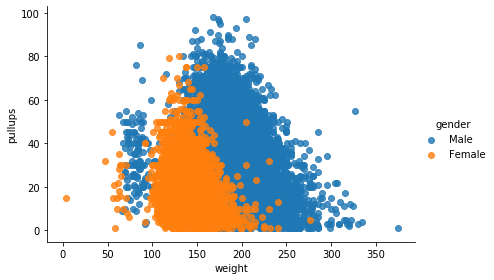

In [149]:
g = sb.FacetGrid(data=athletes, hue='gender', height=4, aspect=1.5)
g = g.map(sb.regplot, 'weight', 'pullups', x_jitter=0.3, fit_reg=False)
g.add_legend();

And we can clearly see that it is pure gender effect. Males tend to weight more than females. They also tend to do more pullups. That's why there was a slight correlation between weight and pullups. 

At this point, some things became clear. 
- There is a correlation between weight and weightlifting results (but there also are weigth categories in weightlifting, so athletes with different physical characteristics have equal chances to win in their category)
- There is no significant correlation between weight and maximum pull-up reps
- There is a correlation between age and results (but there also are age groups, so athletes of different ages have equal chances to win in their category)

So I can conclude, that there is no significant correlation between physical parameters and results. Athletes with different physical parameters have almost equal chances to succeed. 

Now I want to explore, how athlete's "personality" parameters affect their results.

First, I'll make the same scatter plot for weight against weightlifting, but highlight athlete's schedule with color.

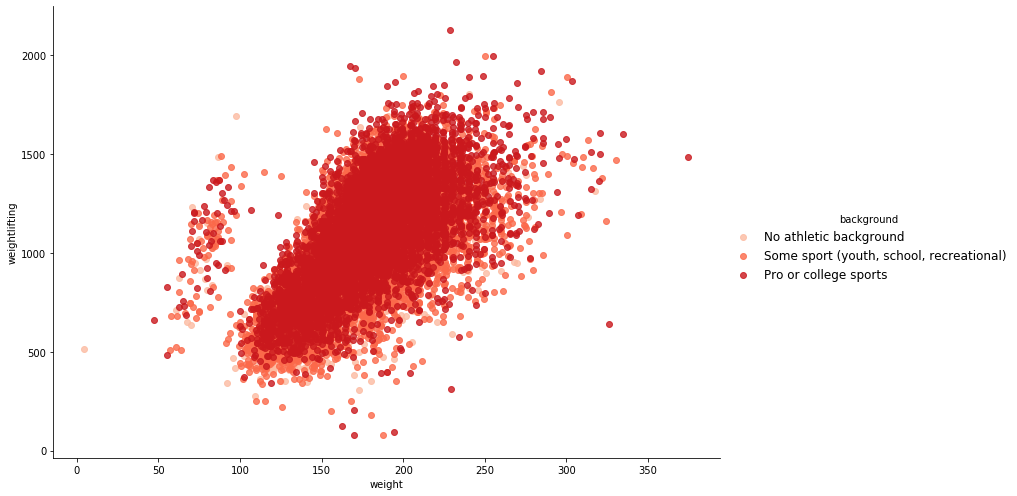

In [166]:
g = sb.FacetGrid(data=athletes, hue='background', height=7, aspect=1.5, palette='Reds')
g = g.map(sb.regplot, 'weight', 'weightlifting', x_jitter=0.9, fit_reg=False)
g.add_legend(fontsize='12');

Ex-pro athletes tend to dominate with the lighter bar weights, but the reason may be in crossfit experience. Weights in weightlifting come with years of training, and people with athletic background are kind of ahead of those who haven't such background. 

But there are enough light-red points on the middle and top sides of the plot. It shows that people with non-pro athletic background can achieve the same results as ex-pros in crossfit.

Now I want to plot the same scatter but use athlete's experience level as hue.

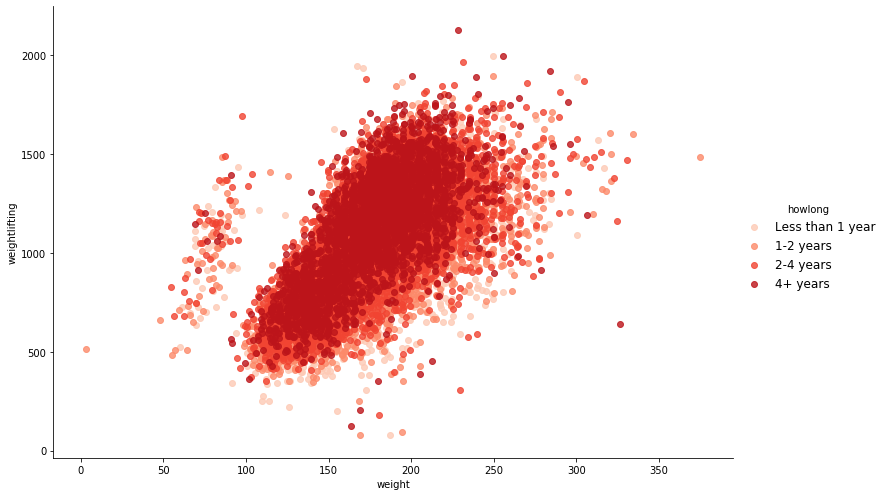

In [168]:
g = sb.FacetGrid(data=athletes, hue='howlong', height=7, aspect=1.5, palette='Reds')
g = g.map(sb.regplot, 'weight', 'weightlifting', x_jitter=0.9, fit_reg=False)
g.add_legend(fontsize='12');

The correlation is much stronger in this case. We can clearly see that experienced athletes tend to lift more weights with lower bodyweight.

Ok, now same plot but schedule highlighted.

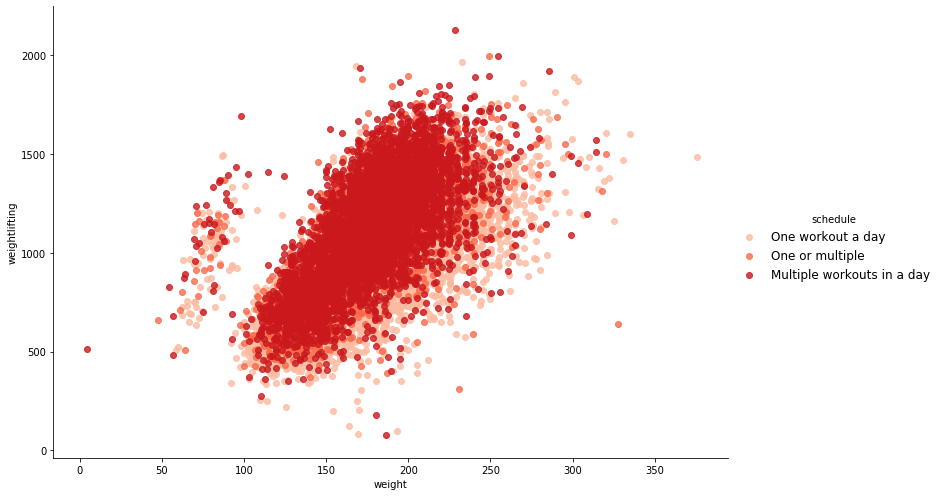

In [167]:
g = sb.FacetGrid(data=athletes, hue='schedule', height=7, aspect=1.5, palette='Reds')
g = g.map(sb.regplot, 'weight', 'weightlifting', x_jitter=0.9, fit_reg=False)
g.add_legend(fontsize='12');

This plot shows another type of correlation. Athletes who don't include days with multiple workouts tend to lose to those who does multiple workouts per day.

Now I want to plot a correlation between weightlifting results, schedule and experience. The best choice of plot type is clustered bar chart.

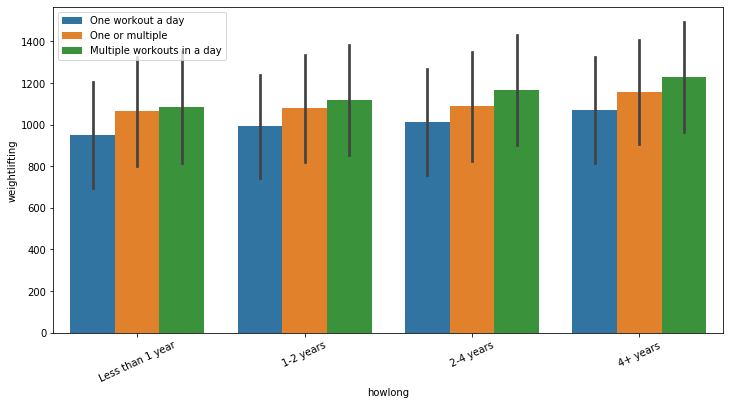

In [180]:
plt.figure(figsize=(12,6))
sb.barplot(data=athletes, x='howlong', y='weightlifting', hue='schedule', ci='sd')
plt.legend(loc=2)
plt.xticks(rotation=25);

We can clearly see that it is all about efforst. Years of experience + frequent training!

The similar plot for pullups:

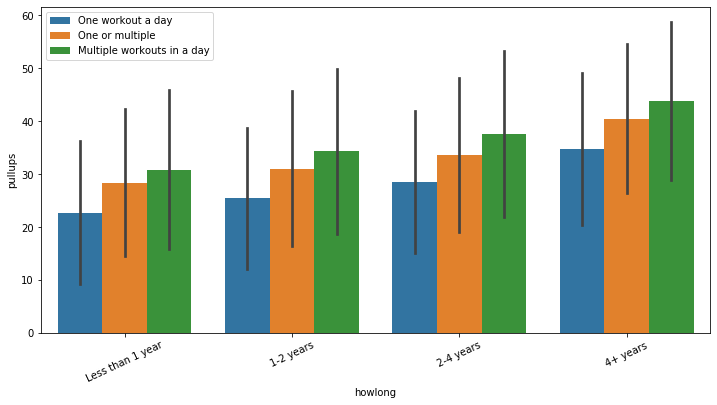

In [181]:
plt.figure(figsize=(12,6))
sb.barplot(data=athletes, x='howlong', y='pullups', hue='schedule', ci='sd')
plt.legend(loc=2)
plt.xticks(rotation=25);

And here is clearly the same situation. 

At this point, I can conclude the following:

**The data shows that physical characteristics and professional background do not have much effect on results. The more efforts an athlete puts into training, the better results he will get.**

In [182]:
# saving the dataset for explanatory part
athletes.to_csv('athletes_expl.csv', index=False)